<h1> Walking and Running Classification </h1>

* The data given consists of different measures to classify whether the activity is Walking(**0**) or Running(**1**). 

* Here we are using those features in order to predict whether the person is walking or Running. The following process is carried out to build a model:
1. Data processing and Cleaning
2. Explortory Data Analysis
3. Feature Engineering and selection
4. Modelling
5. Cross Validation

<h2> Data processing and cleaning</h2>

In [34]:
#importing modules required 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.formula.api import glm
from statsmodels.genmod.families import Binomial

import warnings 
warnings.filterwarnings('ignore')

In [35]:
data=pd.read_csv('walkrun.csv')

In [36]:
data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


* **date**: The date on which the data entry was recorded.
* **time**: The specific time at which the data entry was recorded.
* **username**: The identifier for the user from whom the data was collected.
* **wrist**: It indicates which wrist (left or right) a wearable device was on if the data is from a wearable technology.The wrist signifies whether the performed activity is with left(**0**) hand or right(**1**) hand.
* **activity**: It is a  indicator of the type of activity the user was doing at the time of data collection. Therefore the activity signifies whether the person is Walking(**0**) or Running(**1**).
* **acceleration_x**: The acceleration measured on the x-axis, which could represent lateral movement.
* **acceleration_y**: The acceleration measured on the y-axis, typically indicating vertical movement.
* **acceleration_z**: The acceleration measured on the z-axis, which might be the forward or backward movement.
* **gyro_x**: The angular velocity or rotation around the x-axis.
* **gyro_y**: The angular velocity or rotation around the y-axis.
* **gyro_z**: The angular velocity or rotation around the z-axis.

<h4> Description of data </h4>

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


Here there are no null values are seen.

In [38]:
data.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


- The wrist signifies whether the performed activity is with left(**0**) hand or right(**1**) hand .
- Similarly, activity signifies whether the activity is Walking(**0**) or Running(**1**).

In [39]:
#Defining the function to map activity and wrist according to the descrption
def map_activity(activity):
    if activity == 0:
        return 'walk'
    elif activity == 1:
        return 'run'
    else:
        return np.nan
    
def map_wrist(wrist):
    if wrist==0:
        return 'left'
    elif wrist==1:
        return 'right'
    else:
        return np.nan
    
data['label_activity']= data['activity'].apply(map_activity)
data['label_wrist']=data['wrist'].apply(map_wrist)

In [40]:
data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,label_activity,label_wrist
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,walk,left
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,walk,left
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,walk,left
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,walk,left
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,walk,left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048,walk,left
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761,walk,left
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616,walk,left
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755,walk,left


Lets check for Null values and Duplicate values 

In [41]:
data.isna().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
label_activity    0
label_wrist       0
dtype: int64

In [42]:
data.duplicated().sum()

0

From the above Results it is clear that there are no duplicated values in any columns and there are no null values as well

Let us now convert the date and time into date format as it can be helpful in feature engineering


In [43]:
data['date']= pd.to_datetime(data['date'])
data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S:%f').dt.time

<h2> Exploratory Data Analysis </h2>

In [44]:
df = data.copy()

Let us check whether the data is normally distributed for both the wrist and activities

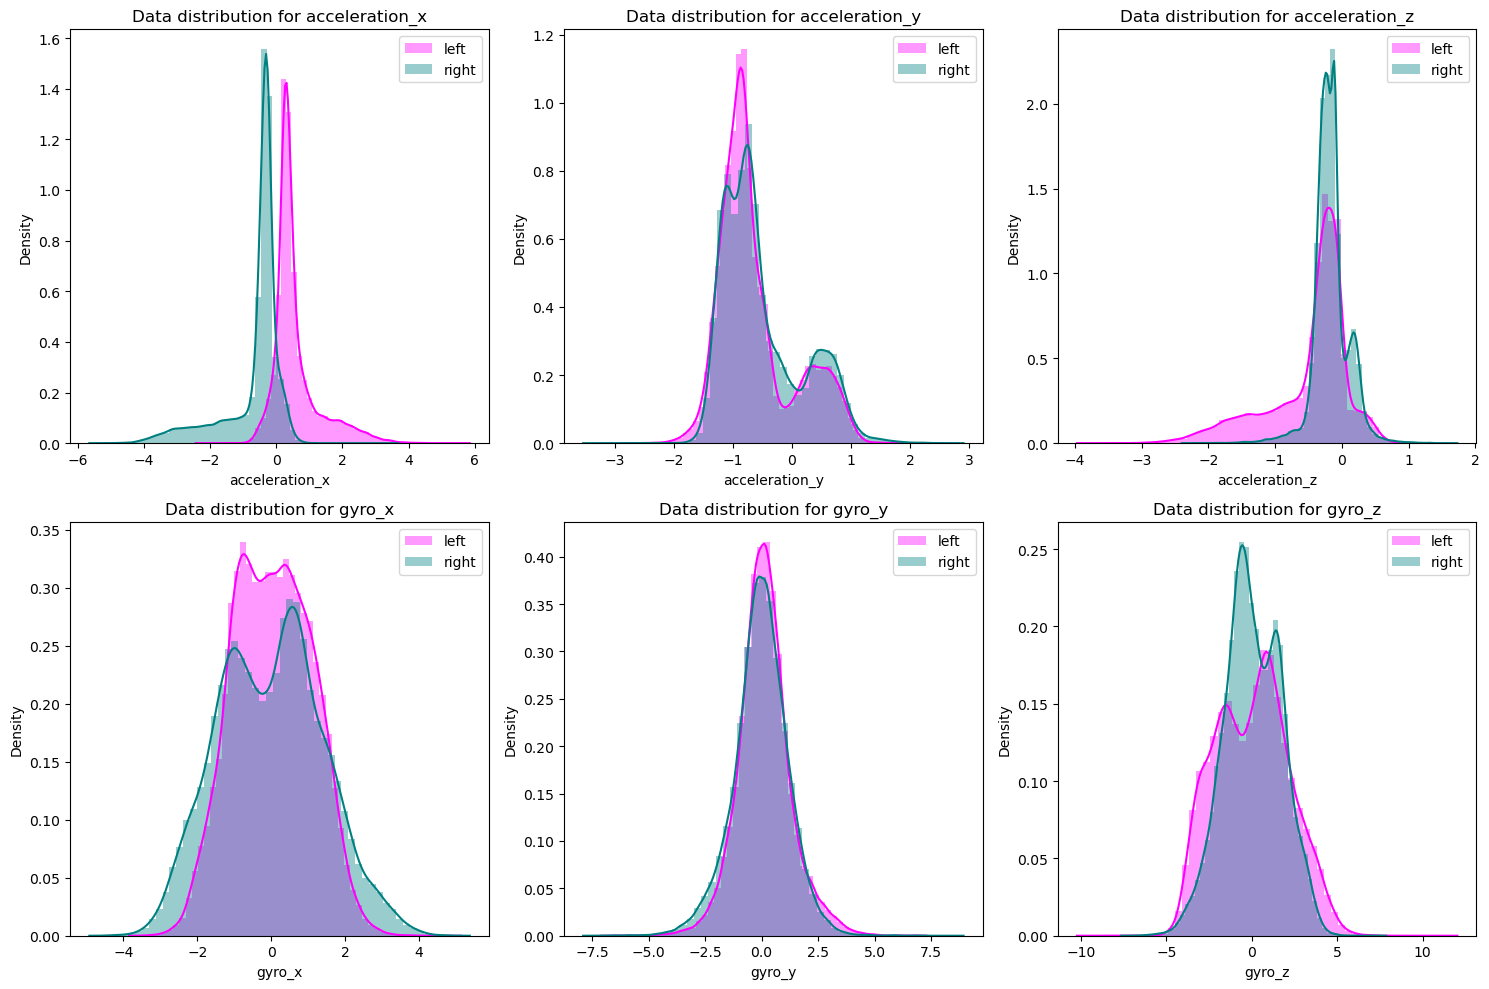

In [45]:
Features = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']


df_left_wrist_data = pd.DataFrame()
df_left_wrist_data = df[df.wrist == 0]

# populate dataframe with 'right' wrist only
df_right_wrist_data = pd.DataFrame()
df_right_wrist_data = df[df.wrist == 1]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, feature in enumerate(Features):
    row = i // 3
    col = i % 3
    
    sns.distplot(df_left_wrist_data[feature], label='left', ax=axes[row, col],color='magenta')
    sns.distplot(df_right_wrist_data[feature], label='right', ax=axes[row, col],color='teal')
    
    axes[row, col].set_title(f'Data distribution for {feature}')
    axes[row, col].legend()

# Adjust layout
plt.tight_layout()
plt.show()

The graphs depict that for both the cases the distribution is slightly normal with little bit of skewness. 

<h3> Correlation heatmap for features</h3>

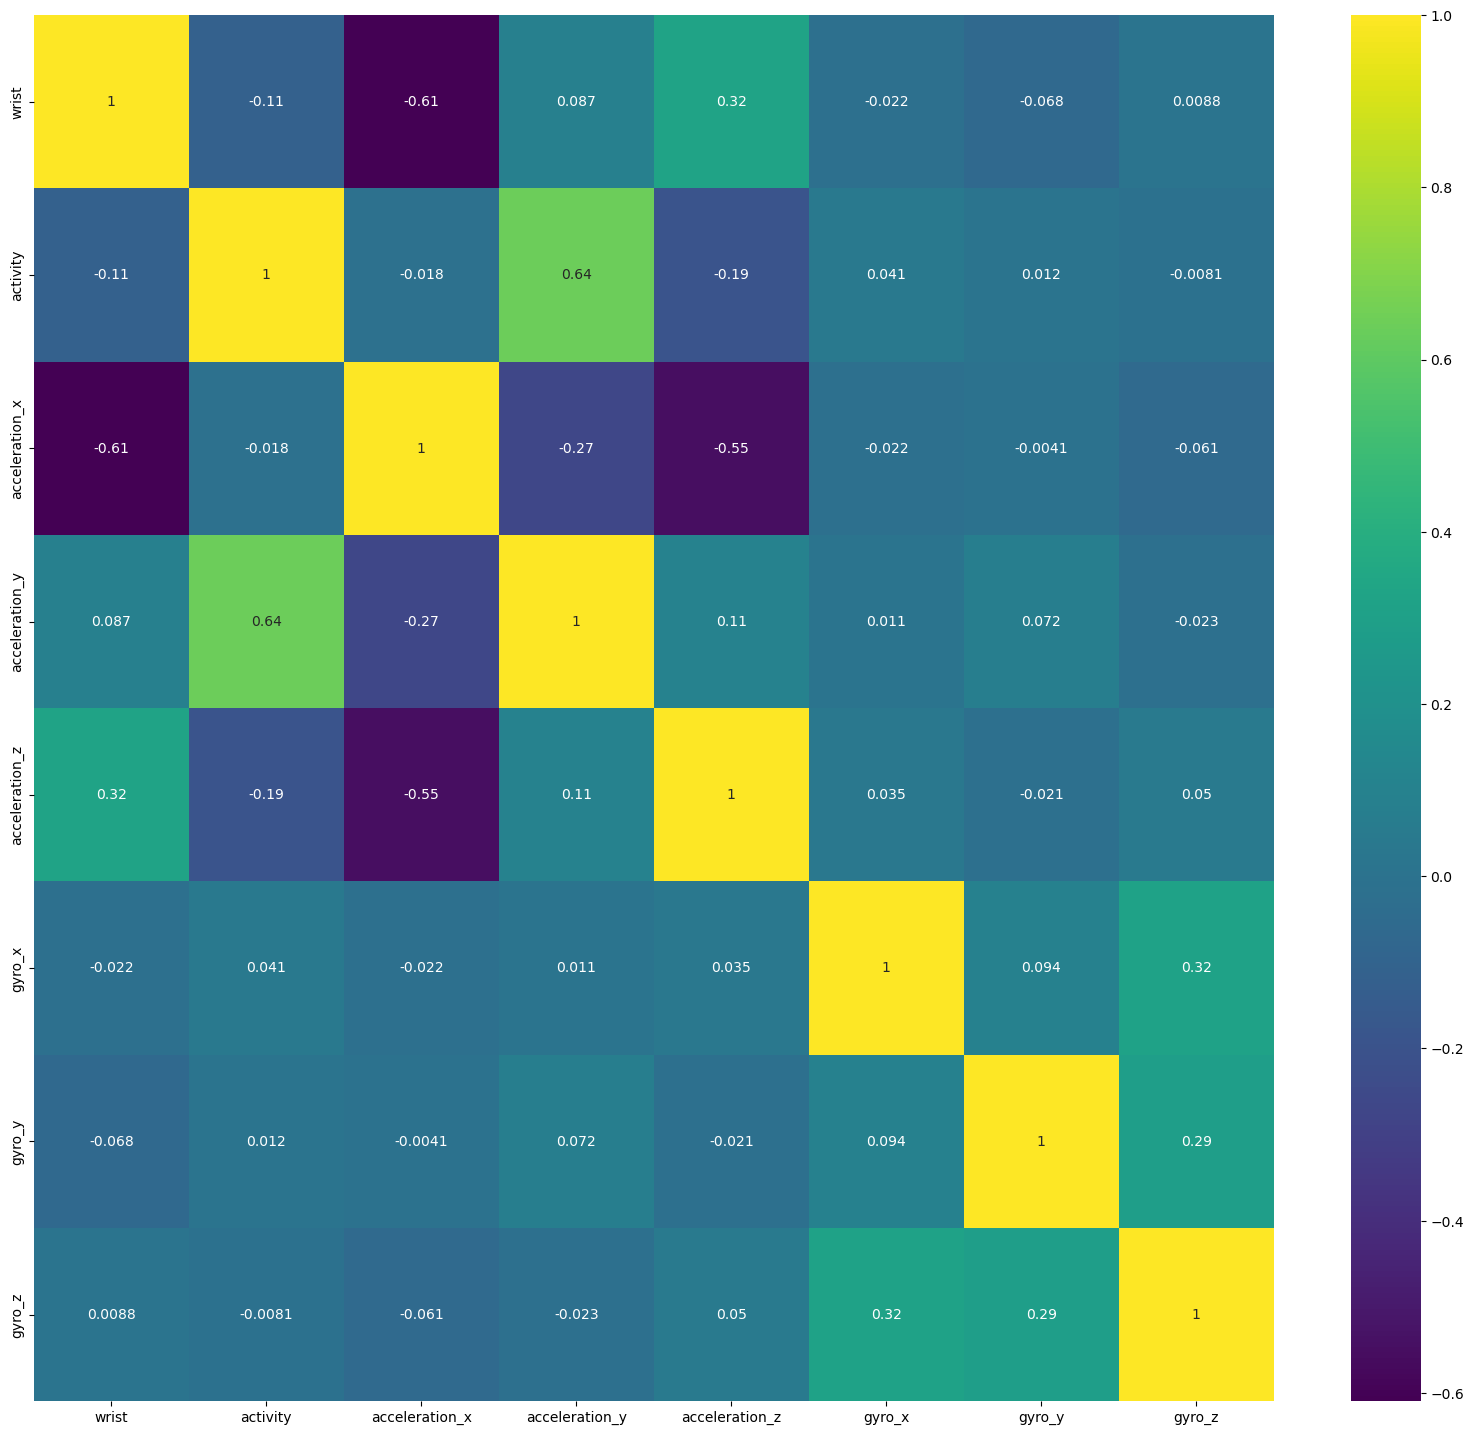

In [46]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(), cmap='viridis',annot=True)
plt.show()


From the above it can be established that these variables has following correlation with Activity:

- **Wrist**: There is a very low negative correlation with activity (-0.11), indicating that the 'wrist' variable has almost no linear relationship with 'activity'.

- **Activity**: The diagonal is always 1 because it's the correlation of the variable with itself.

- **Acceleration_X**: This shows a very low negative correlation with activity (-0.018), suggesting almost no relationship.

- **Acceleration_Y**: There is a moderate positive correlation with activity (0.64), indicating that as 'acceleration_y' increases, 'activity' tends to increase as well.

- **Acceleration_Z**: The correlation is very low and negative with activity (-0.27), suggesting a very weak inverse relationship.

- **Gyro_X**: There's a very weak and essentially negligible positive correlation with activity (0.041), indicating no meaningful linear relationship.

- **Gyro_Y**: The correlation with activity is very low and negative (-0.012), which is also negligible.

- **Gyro_Z**: There's a very weak and essentially negligible negative correlation with activity (-0.0081), indicating no meaningful linear relationship.

<h4> Pairplot of some of the features with Activity</h4>

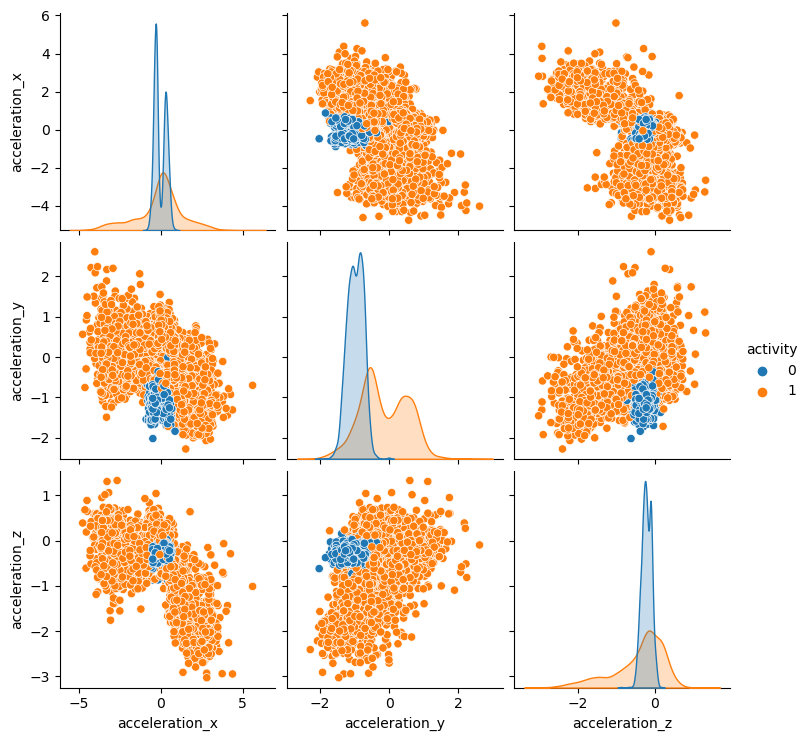

In [47]:
sns.pairplot(df[["acceleration_x", "acceleration_y", "acceleration_z", "activity"]].sample(frac=.1).reset_index(drop=True), hue="activity")

From the graph,

1. **Acceleration_x**: Activity seems to be less distinguishable by acceleration_x alone as the data points overlap significantly; however, there is a slight indication that certain ranges of acceleration_x values are more associated with one activity over the other.

2. **Acceleration_y**: There is a moderate correlation between acceleration_y and activity, as shown by a clearer separation between the two activities; this suggests acceleration_y could be a good predictor for distinguishing between activities.

3. **Acceleration_z**: Like acceleration_y, there is a visible pattern where one activity can be separated from the other based on acceleration_z values, though the distinction is not as clear as with acceleration_y.

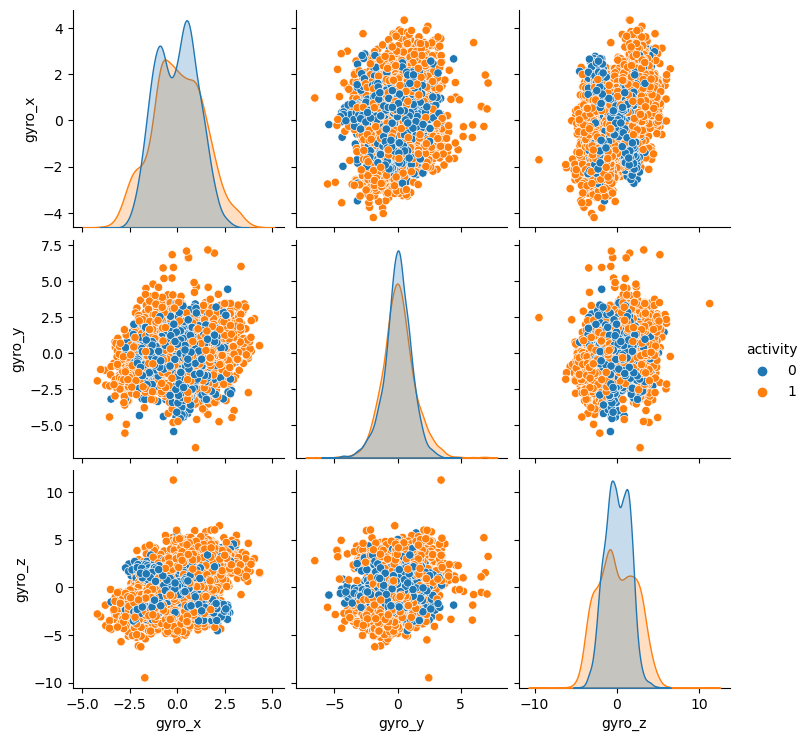

In [48]:
sns.pairplot(df[["gyro_x", "gyro_y", "gyro_z", "activity"]].sample(frac=.1).reset_index(drop=True), hue="activity")

Based on the pairplots of Gyro vs Activity as a hue:

1. **Gyro_x**: The plot shows a significant overlap in data points for both activities, indicating that gyro_x alone may not be a strong predictor for distinguishing between the two activities.

2. **Gyro_y**: Similar to gyro_x, the data points for both activities are largely overlapping with no clear boundary, suggesting that gyro_y, by itself, is not a definitive feature to differentiate between the activities.

3. **Gyro_z**: Although there's still a considerable overlap, the data points for activity '1' seem to be slightly more spread out compared to activity '0', which might offer a marginal advantage in distinguishing between activities using gyro_z, but the distinction is not pronounced.

From the above it is important to do feature engineering as model might be underfit values since '**acceleration_y**' has the highest correaltion to activity amongst other variables.

<h2> Feature Engineering and modeling </h2>

Let us first do simple Logit Regression using all the features and check whether there is any significane f the varabes choosen

In [49]:
import statsmodels.api as sm

# Assuming 'activity' is the target variable and the columns mentioned in the formula are the predictors
formula = 'activity ~ acceleration_x + acceleration_y + acceleration_z + gyro_x + gyro_y + gyro_z'

# Fit the logistic regression model
model_logistic = sm.GLM.from_formula(formula, family=sm.families.Binomial(), data=df)
result = model_logistic.fit()

# Display model summary
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               activity   No. Observations:                88588
Model:                            GLM   Df Residuals:                    88581
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -28770.
Date:                Sat, 06 Jan 2024   Deviance:                       57541.
Time:                        20:10:39   Pearson chi2:                 2.57e+08
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5213
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.3920      0.042    104.

- 'acceleration_x', 'acceleration_y', and 'acceleration_z' show a significant impact on the 'activity' outcome, indicated by their low p-values (p < 0.05).
- 'gyro_x' does not seem to have a significant impact, given its p-value of 0.192 (> 0.05).

Let us Proceed with the decision tree to select and analyse feature importance 

In [50]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Assuming 'df' contains the data used in the logistic regression
# Extracting features and target variable
X_original = df[['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']]
y_original = df['label_activity']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_cv_scores = cross_val_score(dt_classifier, X_original, y_original, cv=5)  # k-fold cross-validation
dt_classifier.fit(X_train_original, y_train_original)

y_pred = dt_classifier.predict(X_test_original)


# Stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dt_cv_scores_stratified = cross_val_score(dt_classifier, X_original, y_original, cv=skf)


# Accuracy scores
dt_accuracy = accuracy_score(y_test_original, dt_classifier.predict(X_test_original))


#Decision Tree
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

print("\nDecision Tree Classification Report:")
print(classification_report(y_test_original, dt_classifier.predict(X_test_original)))
# Cross-validation scores
print("\nDecision Tree Cross-Validation Scores (k-fold):", dt_cv_scores)
print(f"Mean Accuracy (k-fold): {dt_cv_scores.mean():.4f}")

print("\nDecision Tree Cross-Validation Scores (Stratified k-fold):", dt_cv_scores_stratified)
print(f"Mean Accuracy (Stratified k-fold): {dt_cv_scores_stratified.mean():.4f}")






Decision Tree Accuracy: 0.9822

Decision Tree Classification Report:
              precision    recall  f1-score   support

         run       0.98      0.98      0.98      8805
        walk       0.98      0.98      0.98      8913

    accuracy                           0.98     17718
   macro avg       0.98      0.98      0.98     17718
weighted avg       0.98      0.98      0.98     17718


Decision Tree Cross-Validation Scores (k-fold): [0.97708545 0.98340671 0.98662377 0.94728227 0.96314274]
Mean Accuracy (k-fold): 0.9715

Decision Tree Cross-Validation Scores (Stratified k-fold): [0.98351958 0.98199571 0.98210859 0.98453463 0.98267201]
Mean Accuracy (Stratified k-fold): 0.9830


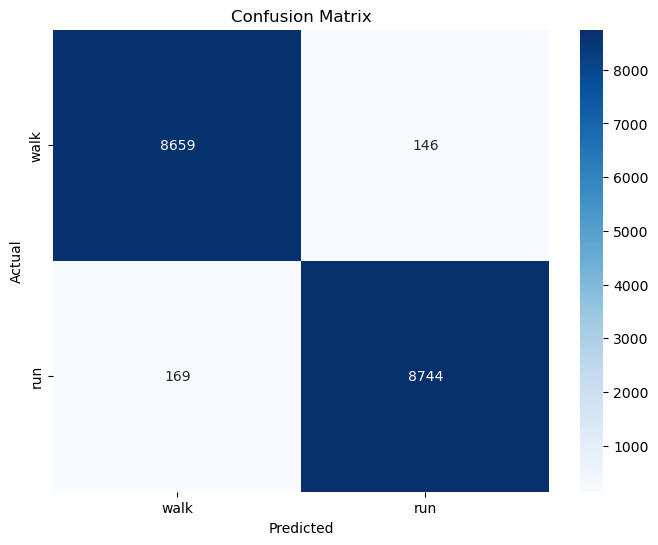

In [51]:
class_labels = ['walk', 'run']  

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test_original, y_pred)

# Plotting the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [52]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_cv_scores = cross_val_score(rf_classifier, X_original, y_original, cv=5)  # k-fold cross-validation
rf_classifier.fit(X_train_original, y_train_original)


#k-fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_cv_scores_stratified = cross_val_score(rf_classifier, X_original, y_original, cv=skf)

#rf accuracy
rf_accuracy = accuracy_score(y_test_original, rf_classifier.predict(X_test_original))


#Random forest Report
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test_original, rf_classifier.predict(X_test_original)))

print("\nRandom Forest Cross-Validation Scores (k-fold):", rf_cv_scores)
print(f"Mean Accuracy (k-fold): {rf_cv_scores.mean():.4f}")
print("\nRandom Forest Cross-Validation Scores (Stratified k-fold):", rf_cv_scores_stratified)
print(f"Mean Accuracy (Stratified k-fold): {rf_cv_scores_stratified.mean():.4f}")


Random Forest Accuracy: 0.9906

Random Forest Classification Report:
              precision    recall  f1-score   support

         run       0.99      0.99      0.99      8805
        walk       0.99      0.99      0.99      8913

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718


Random Forest Cross-Validation Scores (k-fold): [0.990631   0.9900666  0.99243707 0.96257831 0.98109161]
Mean Accuracy (k-fold): 0.9834

Random Forest Cross-Validation Scores (Stratified k-fold): [0.98916356 0.98916356 0.98933288 0.99136423 0.98820342]
Mean Accuracy (Stratified k-fold): 0.9894


<h3>Performance Summary:</h3>

**Random Forest Model**:
* **Test Set Accuracy:** 99.07%
* **Mean Accuracy (k-fold):** 98.35%
* **Mean Accuracy (Stratified k-fold):** 98.94%
* **Precision, Recall, F1-score:** ~99% for both classes

**Decision Tree Model**:
* **Test Set Accuracy:** 98.22%
* **Mean Accuracy (k-fold):** 97.15%
* **Mean Accuracy (Stratified k-fold):** 98.30%
* **Precision, Recall, F1-score:** ~98% for both classes

**Conclusion:**

Both models showcase high accuracy, with the Random Forest slightly outperforming the Decision Tree across various validation methods.
Precision, Recall, and F1-scores for both models are strong, indicating reliable predictive capability.


The classification reports suggest that the model is capable of predicting upto 98% accurately with training accuracy ranging uptil 99%. Hence the models are good. Although the models can be optimised by using tranformation and filtering in order to reduce the count of data and hence degrees of freedom. savgol filter is on such where it reduces the noise present in data by splitting it into window period of desired size

In [59]:
from scipy.signal import savgol_filter


df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S.%f')

# Combining 'date' and 'time' columns into a single datetime column 'datetime'
df['datetime'] = df['date'] + pd.to_timedelta(df['time'].dt.strftime('%H:%M:%S.%f'))

# Setting the 'datetime' column as the DataFrame index
df.set_index('datetime', inplace=True)

# Applying Savitzky-Golay filter to smooth the acceleration data columns
# Definining the window length and polynomial order for the filter
window_length = 7  # Window length of the filter (should be an odd integer)
polyorder = 2  # Polynomial order of the filter

# Applying the filter to the acceleration columns
df['acceleration_x_smoothed'] = savgol_filter(df['acceleration_x'], window_length, polyorder)
df['acceleration_y_smoothed'] = savgol_filter(df['acceleration_y'], window_length, polyorder)
df['acceleration_z_smoothed'] = savgol_filter(df['acceleration_z'], window_length, polyorder)

# Defining the window size (in seconds)
window_size_seconds = 2  # You can adjust this based on your requirement

# Resampling the data based on the defined window size and aggregate features within each window
window_features = df.resample(f'{window_size_seconds}S').agg({
    'acceleration_x_smoothed': 'mean',
    'acceleration_y_smoothed': 'mean',
    'acceleration_z_smoothed': 'mean',
    'activity': 'last',  # Select the last value of 'activity' within each window
    'wrist': 'last'      # Select the last value of 'wrist' within each window
})

# Dropping rows with NaN values (if any)
window_features.dropna(inplace=True)

# Displaying the extracted window-based features
window_features


,acceleration_x_smoothed,acceleration_y_smoothed,acceleration_z_smoothed,activity,wrist
datetime,,,,,
2017-06-30 13:51:14,0.422112,-0.968819,-0.126605,0.0,0.0
2017-06-30 13:51:16,0.455087,-1.018567,-0.028394,0.0,0.0
2017-06-30 13:51:18,0.429486,-1.006607,-0.086851,0.0,0.0
2017-06-30 13:51:20,0.488396,-0.985447,-0.154669,0.0,0.0
2017-06-30 13:51:22,0.460519,-1.002260,-0.101510,0.0,0.0
...,...,...,...,...,...
2017-07-17 20:15:54,-0.663033,0.118864,0.083959,1.0,1.0
2017-07-17 20:15:56,-1.254042,0.191450,0.183844,1.0,1.0
2017-07-17 20:15:58,-1.458811,0.070542,0.190707,1.0,1.0


In [60]:
window_features['activity'].value_counts()

1.0    4693
0.0    4612
Name: activity, dtype: int64

In [61]:
window_features['wrist'].value_counts()

1.0    4747
0.0    4558
Name: wrist, dtype: int64

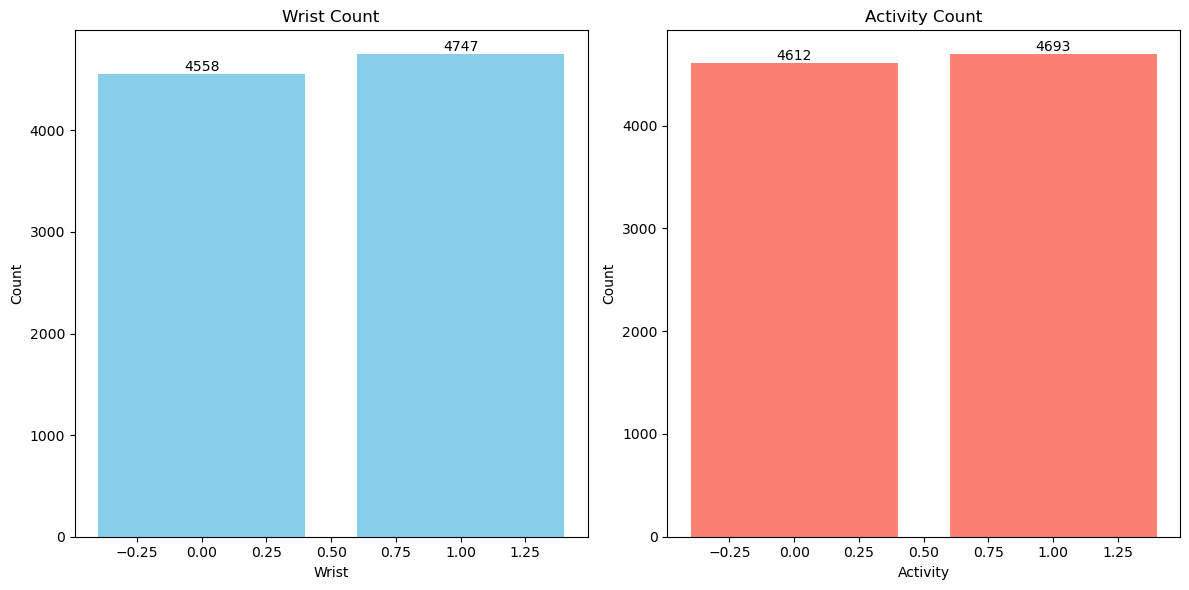

In [62]:
import matplotlib.pyplot as plt

# Counting occurrences of 'wrist' and 'activity'
wrist_counts = window_features['wrist'].value_counts()
activity_counts = window_features['activity'].value_counts()

# Create subplots for wrist and activity counts
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting wrist count
bars = axs[0].bar(wrist_counts.index, wrist_counts.values, color='skyblue')
axs[0].set_title('Wrist Count')
axs[0].set_xlabel('Wrist')
axs[0].set_ylabel('Count')

# Displaying  count labels on top of wrist bars
for bar in bars:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# Plotting activity count
bars = axs[1].bar(activity_counts.index, activity_counts.values, color='salmon')
axs[1].set_title('Activity Count')
axs[1].set_xlabel('Activity')
axs[1].set_ylabel('Count')

# Displaying count labels on top of activity bars
for bar in bars:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# Setting layout tight and display plot
plt.tight_layout()
plt.show()

The data is equally distributed even after the imputation lets go ahead with model Training and validation

In [63]:
def map_activity_label(value):
    if value == 0.0:
        return 'walk'
    elif value == 1.0:
        return 'run'
    else:
        return 'unknown'  # or any default value you want for other cases

# Applying the function to create a new column 'activity_label'
window_features['activity_label'] = window_features['activity'].apply(map_activity_label)

window_features

,acceleration_x_smoothed,acceleration_y_smoothed,acceleration_z_smoothed,activity,wrist,activity_label
datetime,,,,,,
2017-06-30 13:51:14,0.422112,-0.968819,-0.126605,0.0,0.0,walk
2017-06-30 13:51:16,0.455087,-1.018567,-0.028394,0.0,0.0,walk
2017-06-30 13:51:18,0.429486,-1.006607,-0.086851,0.0,0.0,walk
2017-06-30 13:51:20,0.488396,-0.985447,-0.154669,0.0,0.0,walk
2017-06-30 13:51:22,0.460519,-1.002260,-0.101510,0.0,0.0,walk
...,...,...,...,...,...,...
2017-07-17 20:15:54,-0.663033,0.118864,0.083959,1.0,1.0,run
2017-07-17 20:15:56,-1.254042,0.191450,0.183844,1.0,1.0,run
2017-07-17 20:15:58,-1.458811,0.070542,0.190707,1.0,1.0,run


Saving the reduced and filtered dataset

In [64]:
window_features.to_csv('Processed.csv')

<h2> Moddeling and Cross Validation </h2>

<h3>Simple Logistic regression using GLM</h3>

In [65]:
formula = 'activity ~ acceleration_x_smoothed + acceleration_y_smoothed + acceleration_z_smoothed '

# Fit the logistic regression model
model_logistic = sm.GLM.from_formula(formula, family=sm.families.Binomial(), data=window_features)
result = model_logistic.fit()

# Display model summary
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               activity   No. Observations:                 9305
Model:                            GLM   Df Residuals:                     9301
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -108.84
Date:                Sat, 06 Jan 2024   Deviance:                       217.67
Time:                        20:16:26   Pearson chi2:                 2.47e+06
No. Iterations:                    10   Pseudo R-squ. (CS):             0.7441
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

The model accuracy has improved slightly from raw data with accuracy 52 to around 74. Let us split the data into train-test set and verfiy


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import classification_report,accuracy_score,make_scorer

from sklearn.model_selection import train_test_split

features= ['acceleration_x_smoothed', 'acceleration_y_smoothed', 'acceleration_z_smoothed']
target='activity_label'


X = window_features[features]
y = window_features[target]

X_train, X_test, y_train, y_test = train_test_split(window_features[features], window_features[target], test_size=0.4,shuffle=True, random_state=362)


In [67]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating precision and F1 score
precision = precision_score(y_test, y_pred, average='binary', pos_label='walk')
f1 = f1_score(y_test, y_pred, average='binary', pos_label='walk')

print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

Precision: 0.997330485851575
F1 Score: 0.9975967957276368


In [68]:
y_pred_train = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy}")

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Training Accuracy: 0.9980297331183952
Classification Report:
              precision    recall  f1-score   support

         run       1.00      1.00      1.00      1850
        walk       1.00      1.00      1.00      1872

    accuracy                           1.00      3722
   macro avg       1.00      1.00      1.00      3722
weighted avg       1.00      1.00      1.00      3722



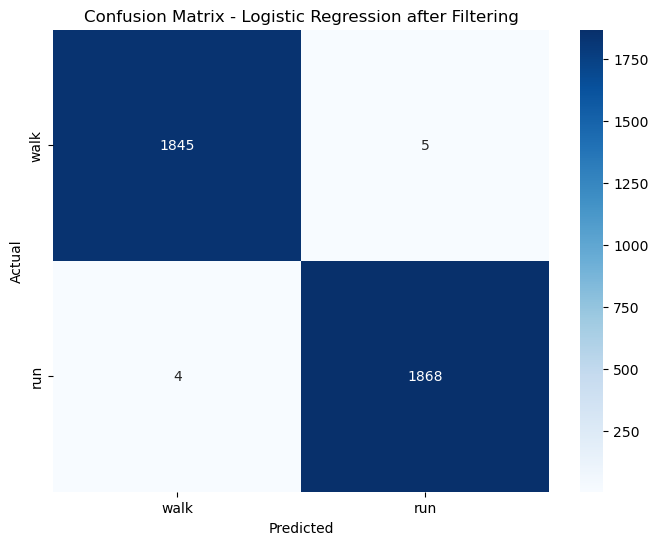

In [70]:


class_labels = ['walk', 'run']  

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression after Filtering')
plt.show()

In [71]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, ShuffleSplit

scorer = make_scorer(accuracy_score)

# Perform cross-validation with different strategies
cv_methods = {
    'KFold': KFold(n_splits=5, shuffle=True, random_state=42),
    'StratifiedKFold': StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    'ShuffleSplit': ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
}

# Perform cross-validation and compute mean accuracy
for method, cv in cv_methods.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring=scorer)
    print(f"{method} Cross-Validation Mean Accuracy: {np.mean(scores)}")

KFold Cross-Validation Mean Accuracy: 0.9978506179473403
StratifiedKFold Cross-Validation Mean Accuracy: 0.9978506179473403
ShuffleSplit Cross-Validation Mean Accuracy: 0.9973132724341752


<h2>Performance Summary after filtering:</h2>

<h3>Logistic Regression Model</h3>

- **Training Accuracy:** 99.80%
- **Test Set Accuracy (Classification Report):**
Precision, Recall, and F1-score are all at 100% for both classes (run and walk), indicating perfect classification on the test set.
Overall accuracy on the test set is 100%.

#### Cross-Validation Mean Accuracy:

**KFold Cross-Validation:** 99.79%
**StratifiedKFold Cross-Validation:** 99.79%
**ShuffleSplit Cross-Validation:** 99.73%


**Conclusion:**

The models display outstanding accuracy both in training and testing, achieving perfect precision, recall, and F1-scores for classifying both 'run' and 'walk' activities.
Cross-validation results confirm the consistency and generalization capability of the models across different validation strategies, with accuracies consistently above 99.7%.
Overall Assessment:

These models demonstrate highly accurate predictions, showcasing strong consistency across different validation methods. The perfect classification on the test set and consistently high cross-validation scores indicate robustness and reliability in predicting 'run' and 'walk' activities.